In [1]:
import numpy as np 
import pandas as pd

In [2]:
real = pd.read_csv('Real_News.csv')
fake = pd.read_csv('Fake_News.csv')

In [3]:
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
fake.head (10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [5]:
import nltk
from nltk import pos_tag 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/melaniemcginley/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
real_news_title_label = real['title'].str.split().map(pos_tag)
fake_news_title_label = fake['title'].str.split().map(pos_tag)

In [7]:
print(real_news_title_label)

0        [(As, IN), (U.S., NNP), (budget, NN), (fight, ...
1        [(U.S., NNP), (military, JJ), (to, TO), (accep...
2        [(Senior, JJ), (U.S., NNP), (Republican, NNP),...
3        [(FBI, NNP), (Russia, NNP), (probe, NN), (help...
4        [(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...
                               ...                        
21412    [('Fully, RB), (committed', JJ), (NATO, NNP), ...
21413    [(LexisNexis, NNP), (withdrew, VBD), (two, CD)...
21414    [(Minsk, NNP), (cultural, JJ), (hub, NN), (bec...
21415    [(Vatican, JJ), (upbeat, NN), (on, IN), (possi...
21416    [(Indonesia, NN), (to, TO), (buy, VB), ($1.14,...
Name: title, Length: 21417, dtype: object


In [8]:
print(fake_news_title_label)

0        [(Donald, NNP), (Trump, NNP), (Sends, VBZ), (O...
1        [(Drunk, NNP), (Bragging, NNP), (Trump, NNP), ...
2        [(Sheriff, NN), (David, NNP), (Clarke, NNP), (...
3        [(Trump, NNP), (Is, VBZ), (So, RB), (Obsessed,...
4        [(Pope, NNP), (Francis, NNP), (Just, NNP), (Ca...
                               ...                        
23476    [(McPain:, NNP), (John, NNP), (McCain, NNP), (...
23477    [(JUSTICE?, NNP), (Yahoo, NNP), (Settles, NNP)...
23478    [(Sunnistan:, NNP), (US, NNP), (and, CC), (All...
23479    [(How, WRB), (to, TO), (Blow, VB), ($700, NNP)...
23480    [(10, CD), (U.S., NNP), (Navy, NNP), (Sailors,...
Name: title, Length: 23481, dtype: object


In [9]:
def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)

In [10]:
real_news_title_label.map(count_tags).head()

0    {'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...
1    {'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...
2    {'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1...
3      {'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}
4    {'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1...
Name: title, dtype: object

In [11]:
fake_news_title_label.map(count_tags).head()

0     {'NNP': 6, 'VBZ': 2, 'RP': 1, 'VBG': 2, 'DT': 1}
1                                           {'NNP': 8}
2    {'NN': 1, 'NNP': 8, 'DT': 2, 'IN': 1, 'VBG': 1...
3    {'NNP': 5, 'VBZ': 2, 'RB': 2, 'JJ': 1, 'PRP': ...
4    {'NNP': 7, 'VBD': 1, 'RP': 1, 'IN': 1, 'PRP$': 1}
Name: title, dtype: object

In [12]:
real_news_title_label=pd.DataFrame(real_news_title_label)
real_news_title_label['tag_counts']=real_news_title_label['title'].map(count_tags)
tag_set=list(set([tag for tags in real_news_title_label['tag_counts'] for tag in tags]))
for tag in tag_set:
    real_news_title_label[tag]=real_news_title_label['tag_counts'].map(lambda x: x.get(tag, 0))
title='Count of Grammatical Tagging in Real News Articles Titles'

In [13]:
print(real_news_title_label[tag_set].sum().sort_values())

,           1
WP$         4
UH          4
$           4
SYM        10
PDT        13
EX         14
RBS        15
''         43
WDT        75
FW        101
WRB       128
RBR       150
WP        190
JJS       309
:         360
PRP$      447
JJR       494
POS       601
RP        664
PRP       787
NNPS      843
CC        955
MD       1964
DT       1994
VBN      2173
VBD      2661
RB       2834
CD       2965
VBG      3243
VBP      3609
TO       7798
VB       8778
VBZ     10894
NNS     17072
JJ      17180
IN      23474
NN      46762
NNP     53582
dtype: int64


In [14]:
fake_news_title_label=pd.DataFrame(fake_news_title_label)
fake_news_title_label['tag_counts']=fake_news_title_label['title'].map(count_tags)
tag_set=list(set([tag for tags in fake_news_title_label['tag_counts'] for tag in tags]))
for tag in tag_set:
    fake_news_title_label[tag]=fake_news_title_label['tag_counts'].map(lambda x: x.get(tag, 0))
title='Count of Grammatical Tagging in Fake News Articles Titles'  

In [15]:
print(fake_news_title_label[tag_set].sum().sort_values())

''           1
,            4
UH           5
POS          6
.           12
FW          31
PDT         35
$           38
:           40
RBS         46
RBR         75
EX          82
JJS        165
WDT        271
JJR        281
MD         666
RP         668
WP         757
WRB       1306
VBN       1339
NNPS      2269
PRP$      2564
VBP       2633
CD        2790
RB        2972
CC        3578
NNS       3635
PRP       3999
VBD       4181
VBG       4181
VBZ       5017
VB        5764
JJ        6155
DT        8635
TO        8684
NN       13888
IN       28951
NNP     230217
dtype: int64


<AxesSubplot:title={'center':'Real News Articles - Top 20 Frequent Words'}>

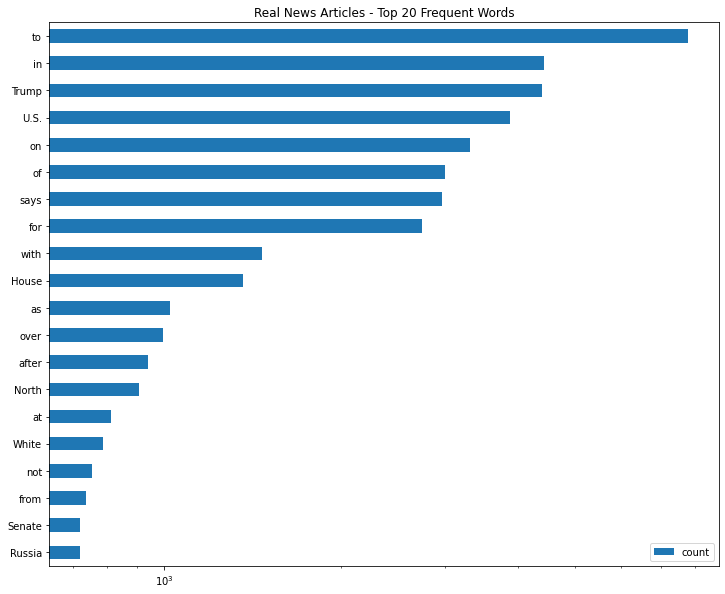

In [16]:
vocab = {}
for row in real_news_title_label['title']:
    for word, tag in row:
        if word in vocab:
            vocab[word] += 1
        else:
            vocab[word] = 1

vocab_df = pd.DataFrame.from_dict(vocab, orient='index')
vocab_df.columns = ['count']
size = 20
title = 'Real News Articles - Top {} Frequent Words'.format(size)
vocab_df.sort_values(by='count').tail(size).plot(kind='barh', logx=True, figsize=(12,10), title=title)

<AxesSubplot:title={'center':'Fake News Articles - Top 20 Frequent Words'}>

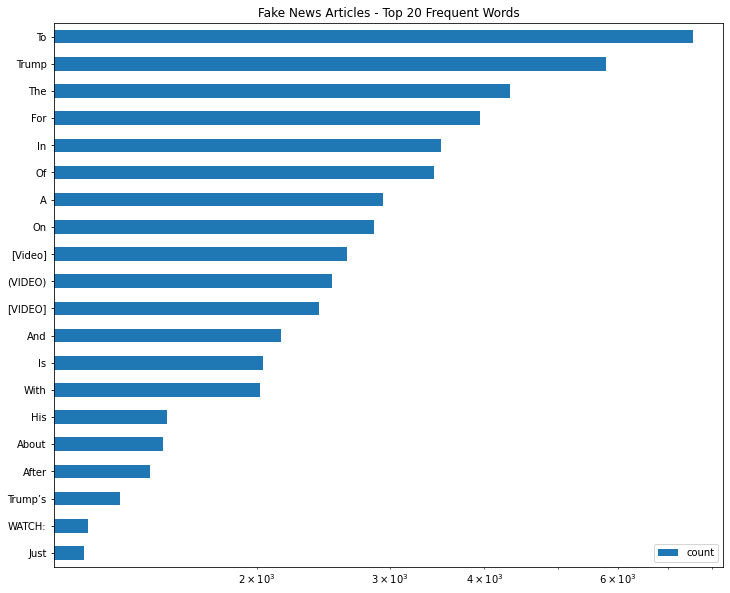

In [17]:
vocab = {}
for row in fake_news_title_label['title']:
    for word, tag in row:
        if word in vocab:
            vocab[word] += 1
        else:
            vocab[word] = 1

vocab_df = pd.DataFrame.from_dict(vocab, orient='index')
vocab_df.columns = ['count']
size = 20
title = 'Fake News Articles - Top {} Frequent Words'.format(size)
vocab_df.sort_values(by='count').tail(size).plot(kind='barh', logx=True, figsize=(12,10), title=title)

In [18]:
def generate_ngrams(text, n=2):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]

<AxesSubplot:title={'center':'Real News Articles - Top Trigrams'}>

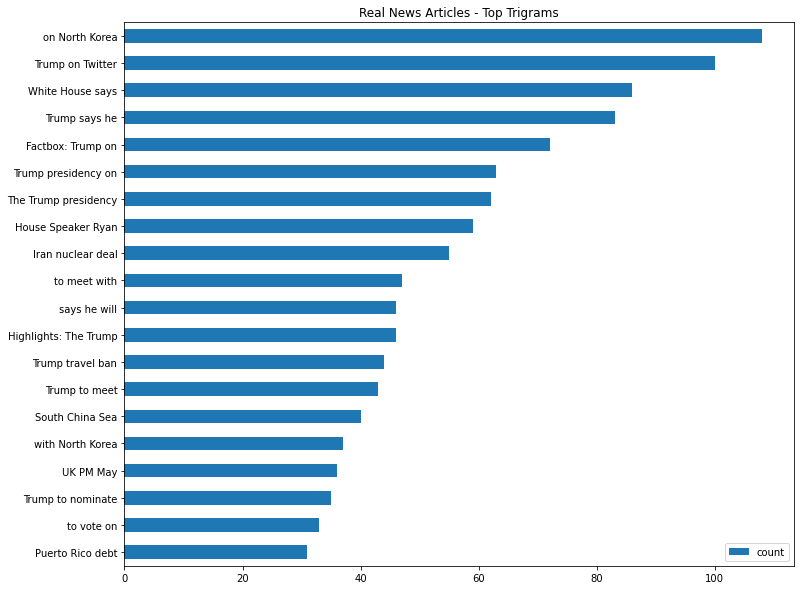

In [19]:
n = 3 
ngrams = {}
for title in real['title']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df_real = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df_real.columns = ['count']
size = 20
title = 'Real News Articles - Top Trigrams'.format(size, n)
ngrams_df_real.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

<AxesSubplot:title={'center':'Fake News Articles - Top Trigrams'}>

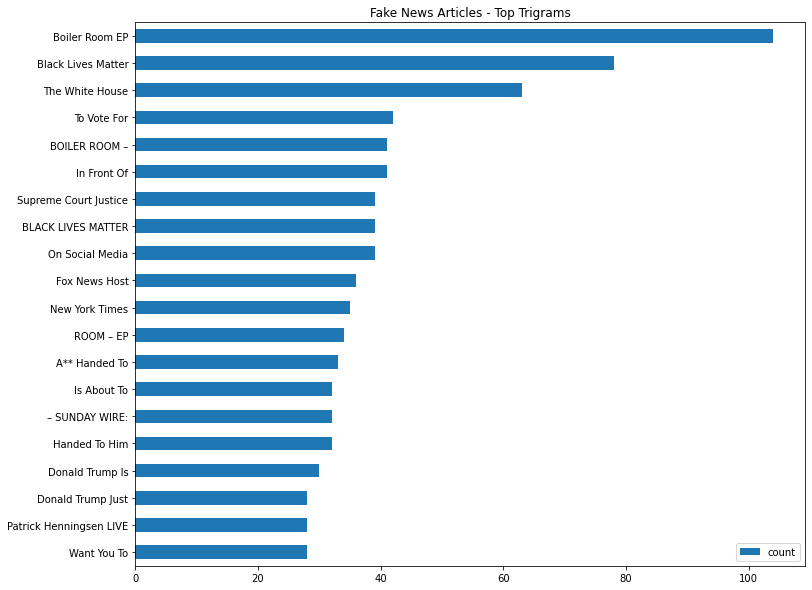

In [20]:
n = 3 
ngrams = {}
for title in fake['title']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df_fake = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df_fake.columns = ['count']
size = 20
title = 'Fake News Articles - Top Trigrams'.format(size, n)
ngrams_df_fake.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

In [21]:
print(ngrams_df_real.index)
real_trigram = ngrams_df_real.index.str.split().map(pos_tag)

Index(['As U.S. budget', 'U.S. budget fight', 'budget fight looms,',
       'fight looms, Republicans', 'looms, Republicans flip',
       'Republicans flip their', 'flip their fiscal', 'their fiscal script',
       'U.S. military to', 'military to accept',
       ...
       'of Pope Francis', 'Pope Francis visiting', 'Francis visiting Russia',
       'Indonesia to buy', 'to buy $1.14', 'buy $1.14 billion',
       '$1.14 billion worth', 'billion worth of', 'worth of Russian',
       'of Russian jets'],
      dtype='object', length=148687)


In [22]:
import pickle
with open('real_news_title_label.pickle','wb') as f:
    pickle.dump(real_news_title_label, f)

In [23]:
import pickle
with open('fake_news_title_label.pickle','wb') as f:
    pickle.dump(fake_news_title_label, f)

In [24]:
print(real.iloc[1,0])

U.S. military to accept transgender recruits on Monday: Pentagon


In [25]:
print(real_news_title_label)

                                                   title  \
0      [(As, IN), (U.S., NNP), (budget, NN), (fight, ...   
1      [(U.S., NNP), (military, JJ), (to, TO), (accep...   
2      [(Senior, JJ), (U.S., NNP), (Republican, NNP),...   
3      [(FBI, NNP), (Russia, NNP), (probe, NN), (help...   
4      [(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...   
...                                                  ...   
21412  [('Fully, RB), (committed', JJ), (NATO, NNP), ...   
21413  [(LexisNexis, NNP), (withdrew, VBD), (two, CD)...   
21414  [(Minsk, NNP), (cultural, JJ), (hub, NN), (bec...   
21415  [(Vatican, JJ), (upbeat, NN), (on, IN), (possi...   
21416  [(Indonesia, NN), (to, TO), (buy, VB), ($1.14,...   

                                              tag_counts  TO  WRB  VBN  PRP$  \
0      {'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...   0    0    0     1   
1      {'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...   1    0    0     0   
2      {'JJ': 1, 'NNP': 4, 'NN': 2, 'PO

In [26]:
real = pd.read_pickle("Real_news_title_label.pickle")
fake = pd.read_pickle("Fake_news_title_label.pickle")

In [27]:
def add_status(df, stat):
    rows = df.shape[0]
    status = []
    for i in range(rows):
        status.append(stat)
    return status

In [29]:
status_real = add_status(real, "Real")

In [30]:
status_fake = add_status(fake, "Fake")

In [31]:
real['Status'] = status_real

In [32]:
fake['Status'] = status_fake

In [33]:
real.head()

,title,tag_counts,TO,WRB,VBN,PRP$,SYM,VBG,UH,MD,...,",",RBS,JJS,WP$,PRP,POS,CC,NNP,PDT,Status
0,"[(As, IN), (U.S., NNP), (budget, NN), (fight, ...","{'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Real
1,"[(U.S., NNP), (military, JJ), (to, TO), (accep...","{'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,Real
2,"[(Senior, JJ), (U.S., NNP), (Republican, NNP),...","{'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,4,0,Real
3,"[(FBI, NNP), (Russia, NNP), (probe, NN), (help...","{'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,Real
4,"[(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...","{'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,Real


In [34]:
fake.head()

,title,tag_counts,TO,WRB,VBN,PRP$,VBG,UH,MD,VB,...,",",RBS,JJS,PRP,POS,CC,.,RP,PDT,Status
0,"[(Donald, NNP), (Trump, NNP), (Sends, VBZ), (O...","{'NNP': 6, 'VBZ': 2, 'RP': 1, 'VBG': 2, 'DT': 1}",0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,Fake
1,"[(Drunk, NNP), (Bragging, NNP), (Trump, NNP), ...",{'NNP': 8},0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
2,"[(Sheriff, NN), (David, NNP), (Clarke, NNP), (...","{'NN': 1, 'NNP': 8, 'DT': 2, 'IN': 1, 'VBG': 1...",1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
3,"[(Trump, NNP), (Is, VBZ), (So, RB), (Obsessed,...","{'NNP': 5, 'VBZ': 2, 'RB': 2, 'JJ': 1, 'PRP': ...",0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Fake
4,"[(Pope, NNP), (Francis, NNP), (Just, NNP), (Ca...","{'NNP': 7, 'VBD': 1, 'RP': 1, 'IN': 1, 'PRP$': 1}",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Fake


In [35]:
data = pd.concat([real, fake],join="inner")

In [36]:
data.head()

,title,tag_counts,TO,WRB,VBN,PRP$,VBG,UH,MD,VB,...,DT,",",RBS,JJS,PRP,POS,CC,NNP,PDT,Status
0,"[(As, IN), (U.S., NNP), (budget, NN), (fight, ...","{'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Real
1,"[(U.S., NNP), (military, JJ), (to, TO), (accep...","{'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,0,Real
2,"[(Senior, JJ), (U.S., NNP), (Republican, NNP),...","{'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1...",0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,4,0,Real
3,"[(FBI, NNP), (Russia, NNP), (probe, NN), (help...","{'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,Real
4,"[(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...","{'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1...",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,0,Real


In [37]:
data = data.drop(columns=['title', 'tag_counts'])

In [38]:
for col in data.columns:
    print(col)

TO
WRB
VBN
PRP$
VBG
UH
MD
VB
JJ
RP
IN
EX
CD
''
VBD
FW
VBP
NN
WP
WDT
NNPS
RBR
VBZ
NNS
JJR
$
:
RB
DT
,
RBS
JJS
PRP
POS
CC
NNP
PDT
Status


In [39]:
data = data.drop(columns=[",", ":", "\'\'", "$"])

In [40]:
original = data.copy()

In [41]:
original

,TO,WRB,VBN,PRP$,VBG,UH,MD,VB,JJ,RP,...,RB,DT,RBS,JJS,PRP,POS,CC,NNP,PDT,Status
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,Real
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,3,0,Real
2,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,4,0,Real
3,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,3,0,Real
4,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,3,0,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,Fake
23477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,Fake
23478,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,10,0,Fake
23479,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,6,0,Fake


In [42]:
data.to_csv("data.csv", index=False)